In [1]:
from IPython.display import Markdown, display

display(Markdown("000_independencia_energetica.md"))


In [2]:
# pip install --upgrade matplotlib


In [3]:
import datetime as dt

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from dateutil.parser  import parse
import matplotlib.dates as mdates

import matplotlib as mpl


In [11]:

mpl.rcParams.keys()

mpl.rcParams['lines.linewidth']         = 8
mpl.rcParams['lines.markersize']        = 18
mpl.rcParams['lines.markerfacecolor']   = "white"
mpl.rcParams['font.family']             = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana']
mpl.rcParams['font.size']               = 30

# colores
azulier     = "#1A3D6F"
naranjaier  = '#C65C25' 
# tamanio = (10.871,5.515)
tamanio = (10,7)

In [5]:
print(plt.rcParams["font.sans-serif"][0])
print(plt.rcParams["font.monospace"][0])


Tahoma
DejaVu Sans Mono


In [6]:
f   = '../data/independencia.csv'
ind = pd.read_csv(f,index_col=0,parse_dates=True)
ind['Año'] = ind.index.year
ind.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2011-01-01 to 2020-01-01
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Factor                9 non-null      float64
 1   Producción            9 non-null      float64
 2   Consumo               9 non-null      float64
 3   Importación           9 non-null      float64
 4   Oferta Interna Bruta  9 non-null      float64
 5   Año                   9 non-null      int64  
dtypes: float64(5), int64(1)
memory usage: 504.0 bytes


##  2014 fue el último año en que México produjo la misma cantidad de energía que la que consumió.

<ipython-input-25-75e4337cd1b2>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(2010,2021,1),rotation=90)


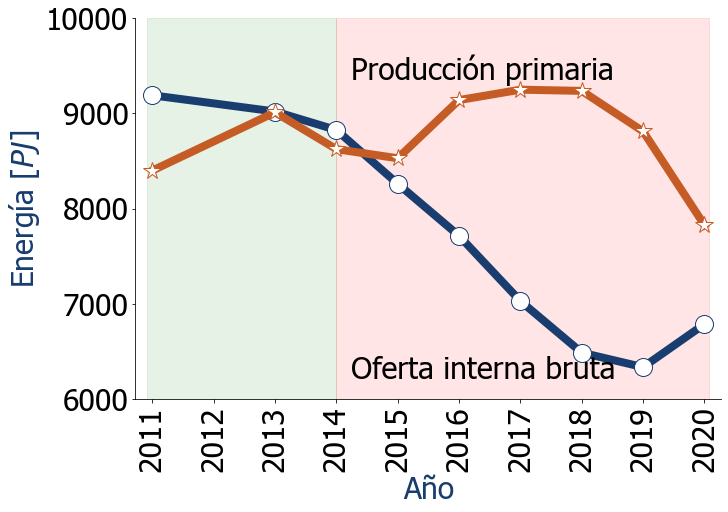

In [25]:
fig, ax = plt.subplots(constrained_layout=True,figsize=tamanio)

#Grafica datos
ax.plot(ind["Producción"], '-o',color=azulier)
ax.plot(ind["Oferta Interna Bruta"], '-*',color=naranjaier)

#Fondo verde y rojo para separar a~nos
ax.axvspan(parse("2010-12-01"),parse("2013-12-31"),alpha=0.1,color='green')
ax.axvspan(parse("2013-12-31"),parse("2020-01-31"),alpha=0.1,color="r")

#L'imites en X y Y
ax.set_xlim(ind.index[0]-pd.Timedelta(100,"d"),ind.index[-1]+pd.Timedelta(100,"d"))
ax.set_ylim(6000,10000)

#Etiquetas y texto
ax.set_ylabel("Energía [$PJ$]",c=azulier)
ax.set_xlabel("Año",c=azulier)
#
x = [dt.datetime(2014, 1, 1),dt.datetime(2014, 1, 1)]
y = [6050,9200]
ax.annotate('Oferta interna bruta', (mdates.date2num(x[0]), y[0]), xytext=(15, 15), 
            textcoords='offset points',)
ax.annotate('Producción primaria', (mdates.date2num(x[1]), y[1]), xytext=(15, 15), 
            textcoords='offset points')

# Formato de gr'afica
# ax.xaxis.set_major_locator(mdates.YearLocator(base=1))
# ax.xaxis.set_minor_locator(mdates.YearLocator(base=1))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# ax.xaxis.set_major_locator(range(2010,2021,1)) 
ax.set_xticklabels(range(2010,2021,1),rotation=90)
ax.spines[['top','right']].set_visible(False)


fig.savefig('Fig1.png',transparent=True)

# La independencia energética se calcula con la Producción de energía primaria dividida por la oferta interna bruta de energía

<ipython-input-26-7906d37984e7>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(2010,2021,1),rotation=90)


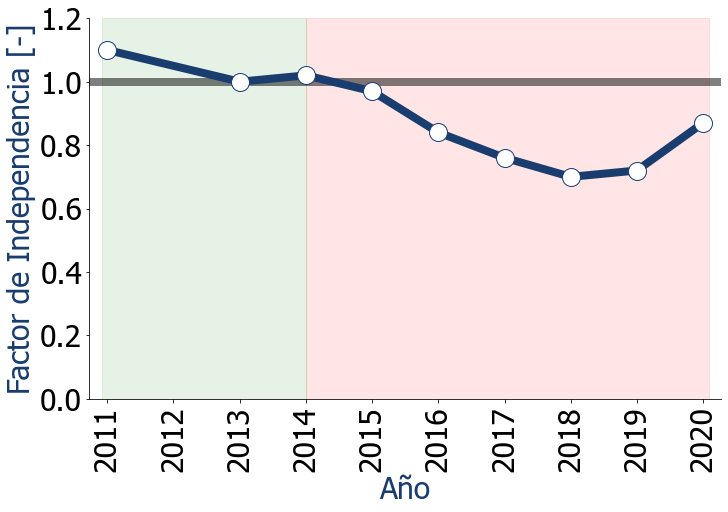

In [26]:
fig, ax = plt.subplots(constrained_layout=True,figsize=tamanio)

#Grafica datos
ax.axhline(y=1,c="k",alpha=0.5)
ax.plot(ind.Factor, '-o',  mfc='white',color=azulier)


#Fondo verde y rojo para separar a~nos
ax.axvspan(parse("2010-12-01"),parse("2013-12-31"),alpha=0.1,color='green')
ax.axvspan(parse("2013-12-31"),parse("2020-01-31"),alpha=0.1,color="r")

#L'imites en X y Y
ax.set_xlim(ind.index[0]-pd.Timedelta(100,"d"),ind.index[-1]+pd.Timedelta(100,"d"))
ax.set_ylim(0,1.2)

#Etiquetas y texto
ax.set_ylabel("Factor de Independencia [-]",c=azulier)
ax.set_xlabel("Año",c=azulier)

# Formato de gr'afica
ax.set_xticklabels(range(2010,2021,1),rotation=90)
ax.spines[['top','right']].set_visible(False)

fig.savefig('Fig2.png',transparent=True)

#  Como México no tiene independencia energética, hoy importa más energía que en el 2014

<ipython-input-27-8c3608e5ac47>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(2010,2021,1),rotation=90)


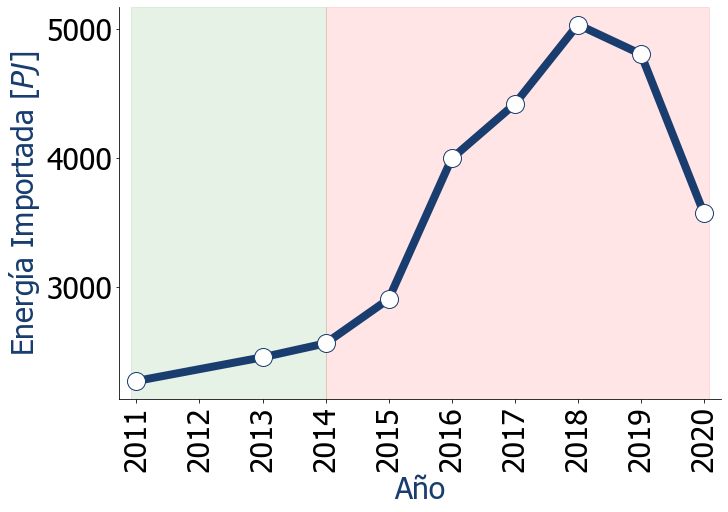

In [27]:
fig, ax = plt.subplots(constrained_layout=True,figsize=tamanio)

#Grafica datos
ax.plot(ind.Importación, '-o',color=azulier)

#Fondo verde y rojo para separar a~nos
ax.axvspan(parse("2010-12-01"),parse("2013-12-31"),alpha=0.1,color='green')
ax.axvspan(parse("2013-12-31"),parse("2020-01-31"),alpha=0.1,color="r")

#L'imites en X y Y
ax.set_xlim(ind.index[0]-pd.Timedelta(100,"d"),ind.index[-1]+pd.Timedelta(100,"d"))
# ax.set_ylim(0,1.2)

#Etiquetas y texto
ax.set_ylabel("Energía Importada [$PJ$]",c=azulier)
ax.set_xlabel("Año",c=azulier)


# Formato de gr'afica
ax.set_xticklabels(range(2010,2021,1),rotation=90)
ax.spines[['top','right']].set_visible(False)


fig.savefig('Fig3.png',transparent=True)